## Load Libs

In [101]:
import pandas as pd
import numpy as np
import os
import sys
import csv
import data_validation_helper as dvh
import importlib
importlib.reload(dvh)

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

Make sure you have the same file structure
1. nmi_info.csv 
2. Consumption Data folder

keep raw data without any processing, easy for future data validation

In [102]:
nmi_path = 'Data\\nmi_info.csv'
consumption_folder = 'Data\\Consumptiondata'

In [103]:
file_pattern = "*.csv"
consumption_dict = dvh.get_file_dict(consumption_folder, file_pattern)

## Data Valiation

### 1. Format Check

In [104]:
# Check 1.1 format check - nmi_info.csv
# nmi_info file is valid csv file
nmi_df_raw = dvh.load_csv(nmi_path, 'nmi_master')

Data\nmi_info.csv is valid csv file.


In [105]:
# Check 1.2 format check - Consumption Data Folder
# Consumption Data Folder contains all files are valid csvs

for name, path in consumption_dict.items():
    dvh.load_csv(path,name)

Data\Consumptiondata\NMIA1.csv is valid csv file.
Data\Consumptiondata\NMIA2.csv is valid csv file.
Data\Consumptiondata\NMIA3.csv is valid csv file.
Data\Consumptiondata\NMIG1.csv is valid csv file.
Data\Consumptiondata\NMIG2.csv is valid csv file.
Data\Consumptiondata\NMIK4.csv is valid csv file.
Data\Consumptiondata\NMIM1.csv is valid csv file.
Data\Consumptiondata\NMIR1.csv is valid csv file.
Data\Consumptiondata\NMIR2.csv is valid csv file.
Data\Consumptiondata\NMIS1.csv is valid csv file.
Data\Consumptiondata\NMIS2.csv is valid csv file.
Data\Consumptiondata\NMIS3.csv is valid csv file.


In [106]:
# Check 1.3 format check - Consumption Data Folder
# Consumption Data Folder contains all files contains csv header

expected_header = ['AESTTime', 'Quantity', 'Unit']
for name, path in consumption_dict.items():
    dvh.check_header(path, expected_header)

Data\Consumptiondata\NMIA1.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].
Data\Consumptiondata\NMIA2.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].
Data\Consumptiondata\NMIA3.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].
Data\Consumptiondata\NMIG1.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].
Data\Consumptiondata\NMIG2.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].
Data\Consumptiondata\NMIK4.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].
Data\Consumptiondata\NMIM1.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].
Data\Consumptiondata\NMIR1.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].
Data\Consumptiondata\NMIR2.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].
Data\Consumptiondata\NMIS1.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].
Data\Consumptiondata\NMIS2.csv has correct csv header as ['AESTTime', 'Quantity', 'Unit'].

### 2. Source Check

In [107]:
# Check 2.1 source check - Consumption Data Folder
# Consumption Data Folder contains all files are csv as extension

file_pattern = '.*\.(?!csv)'
consumption_files = dvh.get_file_list(consumption_folder, file_pattern)
dvh.check_file_format(consumption_files,'csv')

All items are csv


In [108]:
# Check 2.2 source check - Consumption Data Folder
# Consumption Data Folder contain all files with name start with NMI

file_pattern = "[!NMI]*"
consumption_names = dvh.get_name_list(consumption_folder, file_pattern)
dvh.check_file_format(consumption_names,'starts with NMI')

All items are starts with NMI


In [109]:
# Check 2.3 source check - Consumption Data Folder
# No duplicate files does not contain duplicate files

file_pattern = "*"
consumption_names = dvh.get_name_list(consumption_folder, file_pattern)
dvh.check_unique(consumption_names)

All items are unique.


### 3. Missing Data Check

In [110]:
# Check 3.1 missing data check - nmi_info.csv
# nmi_info file contains all nmi has consumption data

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
file_pattern = "*"
consumption_names = dvh.get_name_list(consumption_folder, file_pattern)
dvh.check_missing_nmi(nmi_df['Nmi'].to_list(), consumption_names)

Each nmi in ['NMIM2'] is missing from nmi master file but has consumption data.


In [111]:
# Check 3.2 missing data check - Consumption Data Folder
# NMI has consumption data is in nmi master file

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
file_pattern = "*"
consumption_names = dvh.get_name_list(consumption_folder, file_pattern)
dvh.check_missing_consumption(consumption_names,nmi_df['Nmi'].to_list())

Each nmi in ['NMIK4'] in nmi master file does not have consumption data.


In [112]:
# Check 3.3 missing data check - nmi_info.csv
# nmi_info file do not have missing data

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
dvh.check_missing_data(nmi_df)

nmi_master does not have missing data.


In [113]:
# Check 3.4 missing data check - Consumption Data Folder
# Each consumpton data does not have missing data

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path)
    file_df.columns.name = name
    dvh.check_missing_data(file_df)

NMIA1 does not have missing data.
NMIA2 does not have missing data.
NMIA3 has missing data.
NMIG1 does not have missing data.
NMIG2 does not have missing data.
NMIK4 does not have missing data.
NMIM1 does not have missing data.
NMIR1 does not have missing data.
NMIR2 has missing data.
NMIS1 does not have missing data.
NMIS2 does not have missing data.
NMIS3 has missing data.


### 4. Schema Check

In [114]:
# Check 4.1 schema check - nmi_info.csv
# nmi_info file contains nmi, state and interval as 3 columns

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
dvh.check_columns(nmi_df,['Nmi', 'State', 'Interval'])

nmi_master shows corrent data format as ['Nmi', 'State', 'Interval'].


In [115]:
# Check 4.2 schema check - nmi_info.csv
# nmi_info file contains nmi as string

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
dvh.check_column_type(nmi_df,'Nmi','O')

The Nmi column of nmi_master has correct O type


In [116]:
# Check 4.3 schema check - nmi_info.csv
# nmi_info file contains state as string

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
dvh.check_column_type(nmi_df,'State','O')

The State column of nmi_master has correct O type


In [117]:
# Check 4.4 schema check - nmi_info.csv
# nmi_info file contains interval as integer

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
dvh.check_column_type(nmi_df,'Interval','int64')

The Interval column of nmi_master has incorrect float64 type, should be int64 type.


In [118]:
# Check 4.4 schema check - Consumption Data Folder
# Consumption_data contains AESTTime, Quantity and Unit as 3 columns

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path)
    file_df.columns.name = name
    dvh.check_columns(file_df,['AESTTime', 'Quantity', 'Unit'])

NMIA1 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIA2 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIA3 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIG1 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIG2 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIK4 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIM1 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIR1 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIR2 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIS1 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIS2 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].
NMIS3 shows corrent data format as ['AESTTime', 'Quantity', 'Unit'].


In [119]:
# Check 4.5 schema check - Consumption Data Folder
# Consumption_data contains AESTTime as datatime

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path)
    file_df.columns.name = name
    dvh.check_column_type(file_df,'AESTTime','datetime')

The AESTTime column of NMIA1 has incorrect object type, should be datetime type.
The AESTTime column of NMIA2 has incorrect object type, should be datetime type.
The AESTTime column of NMIA3 has incorrect object type, should be datetime type.
The AESTTime column of NMIG1 has incorrect object type, should be datetime type.
The AESTTime column of NMIG2 has incorrect object type, should be datetime type.
The AESTTime column of NMIK4 has incorrect object type, should be datetime type.
The AESTTime column of NMIM1 has incorrect object type, should be datetime type.
The AESTTime column of NMIR1 has incorrect object type, should be datetime type.
The AESTTime column of NMIR2 has incorrect object type, should be datetime type.
The AESTTime column of NMIS1 has incorrect object type, should be datetime type.
The AESTTime column of NMIS2 has incorrect object type, should be datetime type.
The AESTTime column of NMIS3 has incorrect object type, should be datetime type.


In [120]:
# Check 4.6 schema check - Consumption Data Folder
# Consumption_data contains Quantity as float

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path)
    file_df.columns.name = name
    dvh.check_column_type(file_df,'Quantity','float64')

The Quantity column of NMIA1 has correct float64 type
The Quantity column of NMIA2 has correct float64 type
The Quantity column of NMIA3 has correct float64 type
The Quantity column of NMIG1 has correct float64 type
The Quantity column of NMIG2 has correct float64 type
The Quantity column of NMIK4 has correct float64 type
The Quantity column of NMIM1 has correct float64 type
The Quantity column of NMIR1 has correct float64 type
The Quantity column of NMIR2 has correct float64 type
The Quantity column of NMIS1 has correct float64 type
The Quantity column of NMIS2 has correct float64 type
The Quantity column of NMIS3 has correct float64 type


In [121]:
# Check 4.7 schema check - Consumption Data Folder
# Consumption_data contains Unit as string

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path)
    file_df.columns.name = name
    dvh.check_column_type(file_df,'Unit','O')

The Unit column of NMIA1 has correct O type
The Unit column of NMIA2 has correct O type
The Unit column of NMIA3 has correct O type
The Unit column of NMIG1 has correct O type
The Unit column of NMIG2 has correct O type
The Unit column of NMIK4 has correct O type
The Unit column of NMIM1 has correct O type
The Unit column of NMIR1 has correct O type
The Unit column of NMIR2 has correct O type
The Unit column of NMIS1 has correct O type
The Unit column of NMIS2 has correct O type
The Unit column of NMIS3 has correct O type


## Data Vertification

### 5. Duplicate Check

In [122]:
# Check 5.1 Duplicate Check - nmi_info.csv
# nmi_info file do not contain rows

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
dvh.check_duplicate_rows(nmi_df)

nmi_master does not have duplicate rows


In [123]:
# Check 5.2 Duplicate Check - Consumption Data Folder
#  Consumption_data does not contain duplicate rows
for name, path in consumption_dict.items():
    file_df = pd.read_csv(path,parse_dates=[0])
    file_df.columns.name = name
    dvh.check_duplicate_rows(file_df)

NMIA1 does not have duplicate rows
NMIA2 does not have duplicate rows
NMIA3 does not have duplicate rows
NMIG1 does not have duplicate rows
NMIG2 does not have duplicate rows
NMIK4 does not have duplicate rows
NMIM1 does not have duplicate rows
NMIR1 does not have duplicate rows
NMIR2 have duplicate rows
NMIS1 does not have duplicate rows
NMIS2 does not have duplicate rows
NMIS3 does not have duplicate rows


### 6. Value Check

In [124]:
# Check 6.1 Value Check - nmi_info.csv
# nmi_info file contains nmi starts as NMI

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
input_list = nmi_df[~nmi_df['Nmi'].str.startswith('NMI')]['Nmi'].to_list()
dvh.check_file_format(input_list,'starts with NMI')

All items are starts with NMI


In [125]:
# Check 6.2 Value Check - nmi_info.csv
# nmi_info file contains correct state code as NSW, NT, QLD, SA, VIC, TAS, WA

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
expected_list = ['NSW','NT','QLD','SA','VIC','TAS','WA']
dvh.check_value(nmi_df,"State",expected_list)

The State in nmi_master has correct value from ['NSW', 'NT', 'QLD', 'SA', 'VIC', 'TAS', 'WA']


In [126]:
# Check 6.3 Value Check - nmi_info.csv
# nmi_info file contains correct interval values as 15,30

# copy raw data to do data check
nmi_df = nmi_df_raw.copy()
expected_list = [15,30]
dvh.check_value(nmi_df,"Interval",expected_list)

The Interval in nmi_master has correct value from [15, 30]


In [127]:
# Check 6.4 Value Check - Consumption Data Folder
# nmi_info file contains correct unit measurement

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path,parse_dates=[0])
    file_df.columns.name = name
    expected_list = ['WH','KWH','MWH']
    dvh.check_value(file_df,"Unit",expected_list)

The Unit in NMIA1 has incorrect value as ['Mwh', 'kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIA2 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIA3 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIG1 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIG2 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIK4 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIM1 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIR1 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIR2 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIS1 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIS2 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']
The Unit in NMIS3 has incorrect value as ['kWh'] not from ['WH', 'KWH', 'MWH']


### 7. Consistent Check

In [128]:
# Check 7.1 Consistent Check - nmi_info.csv
# Interval is consistent with AESTTime for consumption data

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path,parse_dates=[0])
    if name in nmi_df['Nmi'].to_list() and name != 'NMIR2':
        interval = int(nmi_df[nmi_df['Nmi'] == name]['Interval'])
        freq=f"{interval}Min"
        file_df = file_df.set_index('AESTTime').asfreq(freq)
        file_missing_dt = len(file_df[file_df['Quantity'].isnull()])
        if file_missing_dt == 0:
            print(f"{name} has consistent data with interval {interval} minutes defined in the master file.")
        else:
            print(f"{name} has inconsistent data with interval {interval} minutes defined in the master file.")

NMIA1 has consistent data with interval 15 minutes defined in the master file.
NMIA2 has consistent data with interval 15 minutes defined in the master file.
NMIA3 has inconsistent data with interval 30 minutes defined in the master file.
NMIG1 has consistent data with interval 30 minutes defined in the master file.
NMIG2 has inconsistent data with interval 30 minutes defined in the master file.
NMIM1 has consistent data with interval 30 minutes defined in the master file.
NMIR1 has consistent data with interval 30 minutes defined in the master file.
NMIS1 has consistent data with interval 30 minutes defined in the master file.
NMIS2 has consistent data with interval 30 minutes defined in the master file.
NMIS3 has inconsistent data with interval 30 minutes defined in the master file.


In [129]:
# Check 7.2 Consistent Check - Consumption Data Folder
# Unit is consistent with single measurement with WH, KWH or MWH

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path,parse_dates=[0])
    file_df.columns.name = name
    dvh.check_consistent(file_df, "Unit")

The Unit in NMIA1 has inconsistent values from ['Mwh', 'kWh']
The Unit in NMIA2 has consistent values from ['kWh']
The Unit in NMIA3 has consistent values from ['kWh']
The Unit in NMIG1 has consistent values from ['kWh']
The Unit in NMIG2 has consistent values from ['kWh']
The Unit in NMIK4 has consistent values from ['kWh']
The Unit in NMIM1 has consistent values from ['kWh']
The Unit in NMIR1 has consistent values from ['kWh']
The Unit in NMIR2 has consistent values from ['kWh']
The Unit in NMIS1 has consistent values from ['kWh']
The Unit in NMIS2 has consistent values from ['kWh']
The Unit in NMIS3 has consistent values from ['kWh']


In [130]:
# Check 7.3 Consistent Check - Consumption Data Folder
# AESTTime has consistent interval data

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path,parse_dates=[0])
    file_df.columns.name = name
    dvh.check_datetime_freq(file_df, 'AESTTime')

NMIA1 shows consistent inverval as 15T.
NMIA2 shows consistent inverval as 15T.
NMIA3 shows consistent inverval as 30T.
NMIG1 shows consistent inverval as 30T.
NMIG2 shows inconsistent inverval
NMIK4 shows consistent inverval as 30T.
NMIM1 shows consistent inverval as 30T.
NMIR1 shows consistent inverval as 30T.
NMIR2 shows consistent inverval as 30T.
NMIS1 shows consistent inverval as 30T.
NMIS2 shows consistent inverval as 30T.
NMIS3 shows consistent inverval as 30T.


### 8. Outlier Check

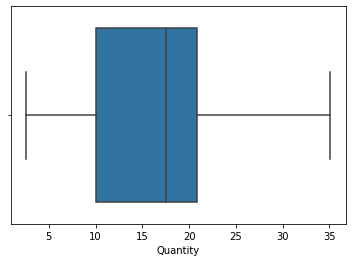

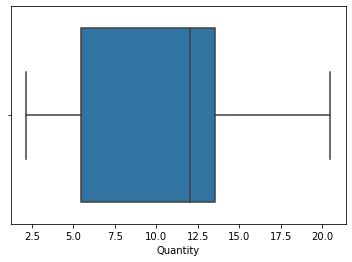

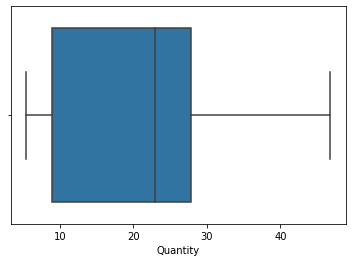

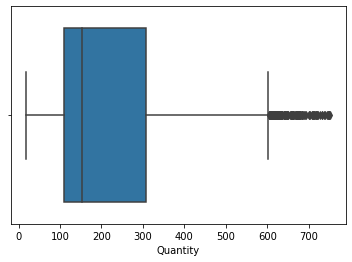

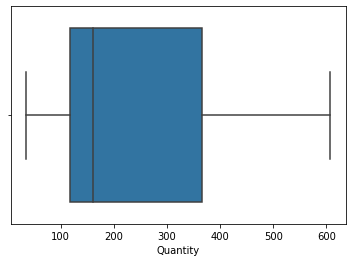

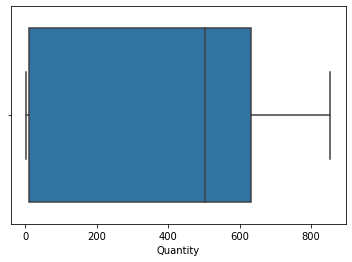

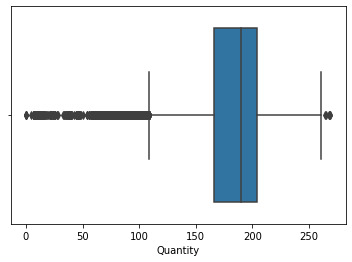

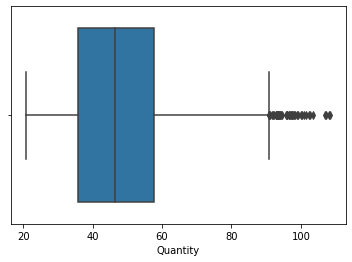

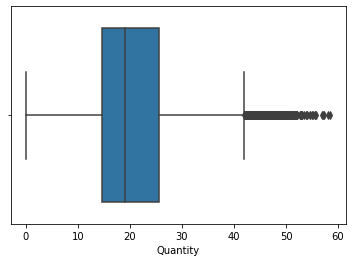

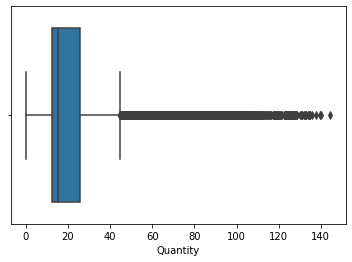

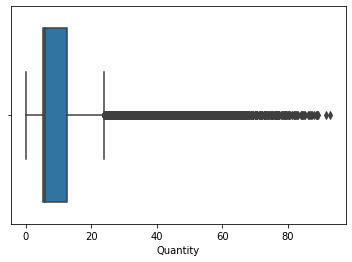

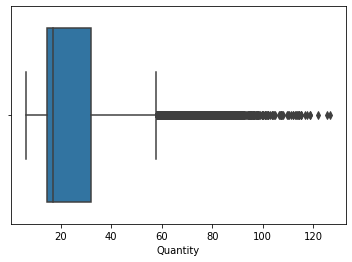

In [131]:
# Check 8.1 Outlier Check - Consumption Data Folder
# Quality is reasonable

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path,parse_dates=[0])
    file_df.columns.name = name
    file_df['Quantity'] = np.where(file_df['Unit'] == 'Mwh', file_df['Quantity'] * 1000.00, file_df['Quantity'])
    sns.boxplot(x = file_df['Quantity'])
    plt.show()

In [132]:
# Check 8.1 Outlier Check - Consumption Data Folder
# Quality is reasonable

for name, path in consumption_dict.items():
    file_df = pd.read_csv(path,parse_dates=[0])
    file_df.columns.name = name
    file_df['Quantity'] = np.where(file_df['Unit'] == 'Mwh', file_df['Quantity'] * 1000.00, file_df['Quantity'])
    dvh.check_outlier(file_df, 'Quantity')

NMIA1 does not have outliers.
NMIA2 does not have outliers.
NMIA3 does not have outliers.
NMIG1 has outliers as 165.
NMIG2 does not have outliers.
NMIK4 does not have outliers.
NMIM1 has outliers as 1253.
NMIR1 has outliers as 48.
NMIR2 has outliers as 432.
NMIS1 has outliers as 2777.
NMIS2 has outliers as 2604.
NMIS3 has outliers as 1904.
